In [26]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
COLORS = ["#348ABD", "#A60628", "#7A68A6", "#467821", "#D55E00", "#CC79A7", "#56B4E9", "#009E73", "#F0E442", "#0072B2"]
matplotlib.rcParams['axes.prop_cycle'] = matplotlib.cycler(color=COLORS) 

## Unit Norm Ball

In [27]:
def unit_norm_ball(ps):
    """
    Plots the unit norm ball for pth-norm in R^2
    ps -> list of p values to plot (int or list of ints)
    """

    # If a single value is given as int convert to list
    if type(ps) == int:
        ps = [ps]

    total_plots = len(ps)
    plt.figure(figsize=(5*total_plots, 5))

    # Plot the unit norm ball for each p    
    for i, p in enumerate(ps):
        if p <= 0:
            raise ValueError('p must be a positive integer')
        plt.subplot(1, total_plots, i+1)
        x = np.linspace(-1, 1, 1000)
        y = (1 - np.abs(x)**p)**(1/p)
        
        plt.plot(x, y, COLORS[0])
        plt.plot(x, -y, COLORS[0])

        plt.fill(x, y, COLORS[0], alpha=0.3)
        plt.fill(x, -y, COLORS[0], alpha=0.3)

        plt.axis('equal')
        plt.grid(True)
        plt.legend([f'{p}-norm ball'], loc='upper right')
        plt.title(f'{p}-norm ball')
    plt.show()

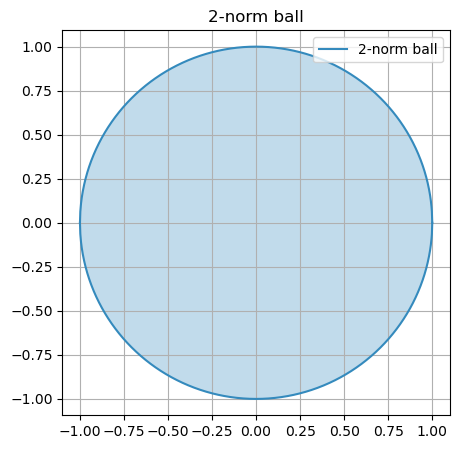

In [28]:
unit_norm_ball(2) # giving a single value as int

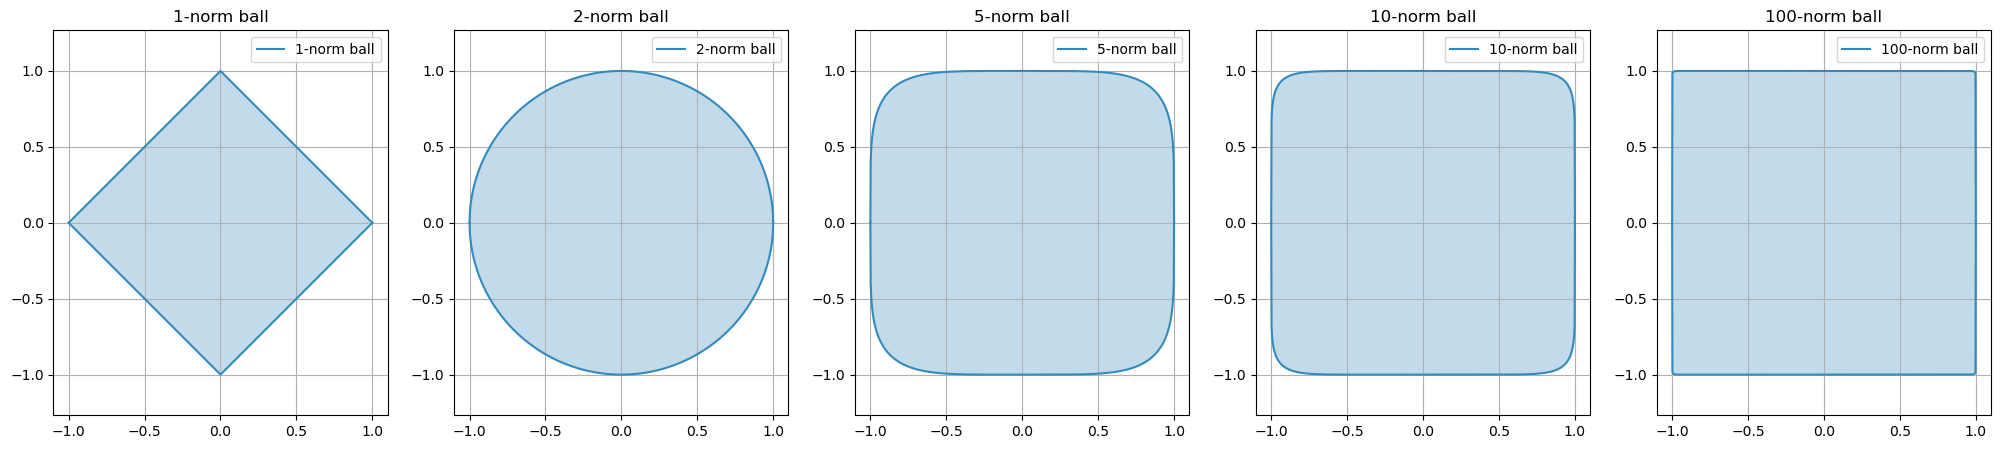

In [29]:
unit_norm_ball([1,2,5,10,100]) # giving a list of values >=1

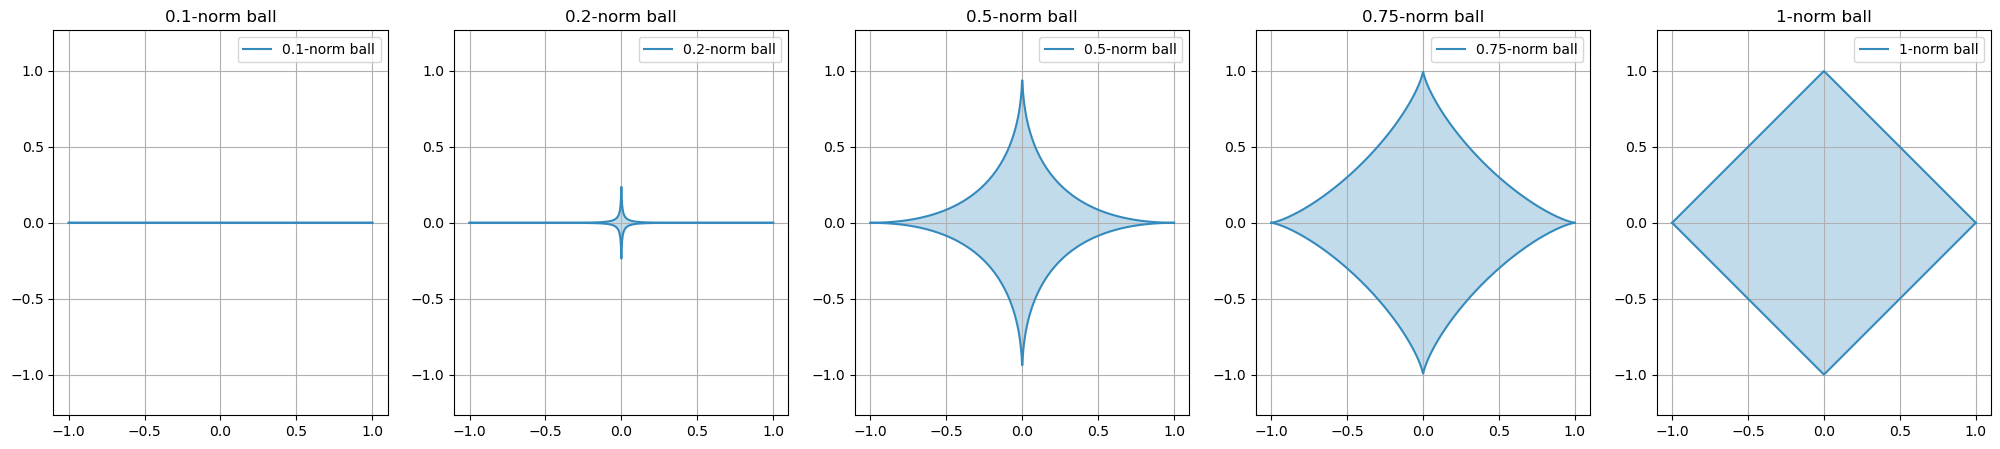

In [30]:
unit_norm_ball([0.1,0.2,0.5,0.75,1]) # giving a list of values >=1

For the plots where $p \ge 1$ the unit norm ball is a convex set because, if we take any two points $\mathbf{x}$ and $\mathbf{y}$ in the unit norm ball, then for any $\lambda \in [0,1]$, $\lambda \mathbf{x} + (1-\lambda)\mathbf{y}$ will also be in the unit norm ball. This is because, for any $p \ge 1$, 
$$
\lVert\lambda \mathbf{x} + (1-\lambda)\mathbf{y}\rVert_p \le \lambda \lVert\mathbf{x}\rVert_p + (1-\lambda)\lVert\mathbf{y}\rVert_p \le 1\\
$$

$$
\Rightarrow \lambda \mathbf{x} + (1-\lambda)\mathbf{y} \in \mathcal{B}_p
$$

where $\mathcal{B}_p$ is the unit norm ball for $p \ge 1$.

For the plots where $p \le 1$ the unit norm ball is not a convex set. We can see it directly from the images. As $\forall p \le 1, \  (1,0), (0,1) \in \mathcal B_p$ but the points on the line segment joining $(1,0)$ and $(0,1)$ is not in $\mathcal B_p$. 

Example $(0.5,0.5) \not \in \mathcal B_p$ for $p \le 1$. Hence, the unit norm ball is not a convex set for $p \le 1$.

## Completeness

Let a sequence in the functional space $\{f\}_n$ as follows

$$
f_n(x) = {1\over 1 + \exp(-nx)}
$$

where $x \in [0,1]$ and $n \in \mathbb{N}$. Here $f_n \in C([0,1]) \ \forall n,m \in \mathbb N$

Showing that the above sequence is Cauchy with respect to the $L_1$ norm. Let $n, m > N_0$ where $N_0 \in \mathbb{N}$

$$
\begin{align*}
\lVert f_n - f_m \rVert_1 &= \int_0^1 \left|{1\over 1 + \exp(-nx)} - {1\over 1 + \exp(-mx)}\right| dx\\
&= \int_0^1 \left|{1 + \exp(-mx) - 1 - \exp(-nx)\over (1 + \exp(-nx))(1 + \exp(-mx))}\right| dx\\
&= \int_0^1 \left|{\exp(-mx) - \exp(-nx)\over (1 + \exp(-nx))(1 + \exp(-mx))}\right| dx\\ \tag{denominator is greater than 1}
&\le \int_0^1 \left|{\exp(-mx) - \exp(-nx)}\right| dx\\  \tag{Triangle inequality}
&\le \int_0^1 \left|{\exp(-mx)}\right| dx + \int_0^1 \left|{\exp(-nx)}\right| dx\\
&= \frac{\exp(-mx)}{-m}\bigg|_0^1 + \frac{\exp(-nx)}{-n}\bigg|_0^1\\
&=  \frac{1}{m} - \frac{\exp(-m)}{m} + \frac{1}{n}  - \frac{\exp(-n)}{n}\\ 
&\le \frac{1}{m} + \frac{1}{n} \\ 
&< \frac{2}{N_0} = \epsilon \tag{$m,n > N_0$}
\end{align*}
$$

Thus, $\{f\}_n$ is a Cauchy sequence because for any $\epsilon > 0 \ \ni N_0 = \displaystyle\frac{2}{\epsilon}$ such that $\forall n,m > N_0, \ \lVert f_n - f_m \rVert_1 < \epsilon$.

If the space $C([0,1])$ is complete with respect to the $L_1$ norm then the sequence $\{f\}_n$ will converge to a function $f \in C([0,1])$. Finding the limit of the sequence

$$
\lim_{n\to\infty} f_n(x) = \lim_{n\to\infty} {1\over 1 + \exp(-nx)} = \begin{cases} 1 & x > 0\\ 0.5 & x = 0 \end{cases}
$$

Let the above function be $f$, then, $f \not \in C([0,1])$ because $f$ is not continuous at $x = 0$. Hence, $C([0,1])$ is not complete with respect to the $L_1$ norm.

Below is a coded illustration of the above example.

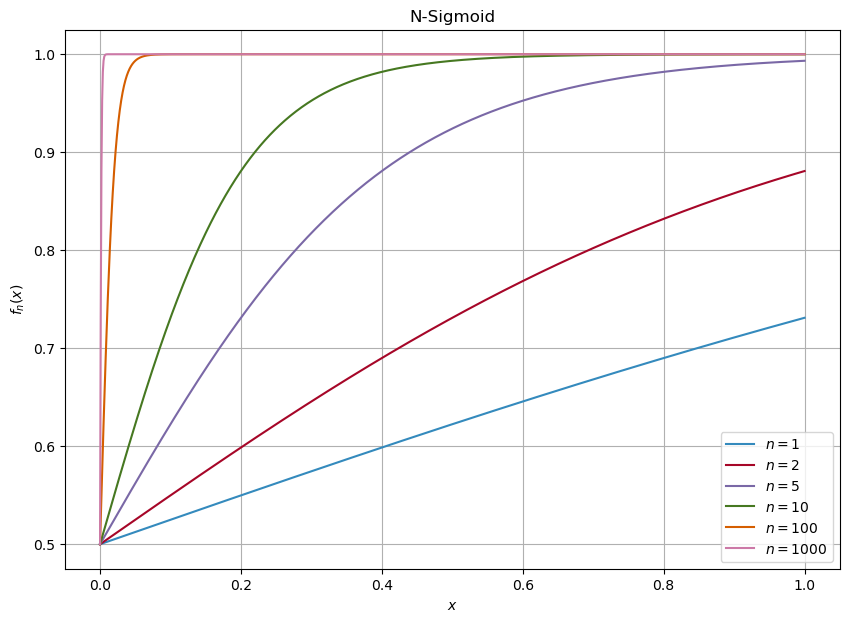

In [31]:
# Defining the N-sigmoid function 
def nSigmoid(n, x):
    return 1/(1+np.exp(-n*x))

x = np.linspace(0, 1, 1000)

# Plotting the N-sigmoid function for different values of n
plt.figure(figsize=(10, 7))
plt.plot(x, nSigmoid(1, x), label=r'$n=1$')
plt.plot(x, nSigmoid(2, x), label=r'$n=2$')
plt.plot(x, nSigmoid(5, x), label=r'$n=5$')
plt.plot(x, nSigmoid(10, x), label=r'$n=10$')
plt.plot(x, nSigmoid(100, x), label=r'$n=100$')
plt.plot(x, nSigmoid(1000, x), label=r'$n=1000$')

plt.grid(True)
plt.legend(loc='lower right')
plt.title('N-Sigmoid')
plt.xlabel(r'$x$')
plt.ylabel(r'$f_n(x)$')
plt.show()

We can see that the sequence is converging to a function $f$ 

$$
f = \begin{cases} 1 & x > 0\\ 0.5 & x = 0 \end{cases}
$$

which is not continuous at $x = 0$. Hence, the space $C([0,1])$ is not complete with respect to the $L_1$ norm.

## Entropy of a Discrete Random Variable

In [32]:
def pmfEntropy(pmf):
    """
    Computes the entropy of a discrete distribution
    pmf -> list of probabilities (We don't need the outcomes)
    """
    
    # Checking if the probability distribution is valid
    if np.abs(sum(pmf) - 1) > 1e-6:
        raise ValueError('The sum of probabilities must be 1')

    # Computing the entropy
    entropy = 0
    for p in pmf:
        if p < 0:
            raise ValueError('Probabilities must be positive')
        elif p == 0: # 0*log(0) = 0
            continue
        else:
            entropy -= p*np.log2(p)
    return entropy

In [33]:
# Example
pmf = [0.4, 0.2, 0.3, 0.1]
print("Entropy of the above pmf is: {} bits".format(np.round(pmfEntropy(pmf), 3)))

Entropy of the above pmf is: 1.846 bits


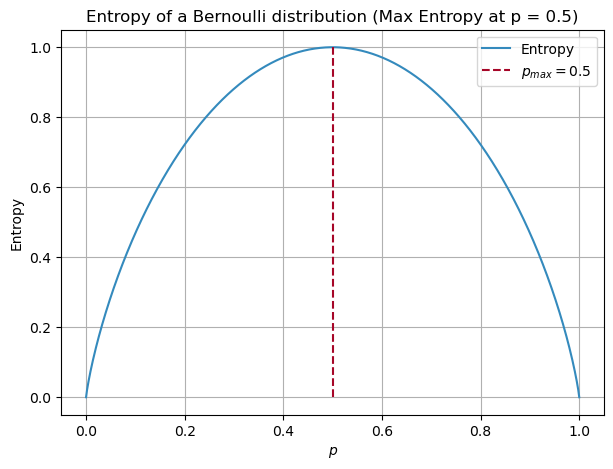

In [34]:
ps = np.linspace(0, 1, 1000) # 1000 values between 0 and 1 (inclusive)
entropies = [pmfEntropy([p, 1-p]) for p in ps] # computing the entropy for Bernoulli(p) distribution

# Finding the maximum entropy and the corresponding p
entropy_arg_max = np.argmax(entropies)  
p_max = np.round(ps[entropy_arg_max], 2) # rounding to 2 decimal places

# Plotting the entropy vs p for a Bernoulli distribution
plt.figure(figsize=(7, 5))
plt.plot(ps, entropies, COLORS[0], label='Entropy')
plt.vlines(p_max, 0, 1, COLORS[1], '--', label=r'$p_{max} = $' + str(p_max))

plt.xlabel(r'$p$')
plt.ylabel('Entropy')
plt.title(f'Entropy of a Bernoulli distribution (Max Entropy at p = {p_max})')
plt.grid(True)
plt.legend(loc="upper right")
plt.show()

The above plot gives the Entropy of the Bernoulli distribution as we vary $p$. The maximum value is achieved at $p = 0.5$.

Finding the above value analytically. 

Let $X \sim \text{Bernoulli}(p)$, then the entropy of $X$ is given by

$$
\begin{align*}
H(X) &= -\sum_{x} p(x) \log p(x) \\
&= -p \log p - (1-p) \log (1-p)\\
\end{align*}
$$

From the plot we can see that $H(X)$ is a concave function in $p$. Thus, we can directly differentiate $H(X)$ with respect to $p$ to find the maximum value of $H(X)$.

$$
\begin{align*}
\frac{dH(X)}{dp} &= -\log p - 1 + \log (1-p) + 1\\
&= -\log p + \log (1-p)\\
&= \log \left(\frac{1-p}{p}\right)\\
\end{align*}
$$

Setting $\frac{dH(X)}{dp} = 0$ we get $p = 0.5$ which matches with the value obtained from the plot.

Intutively, we can see that the entropy of a Bernoulli distribution is maximum when $p = 0.5$ because the distribution is symmetric about $p = 0.5$ i.e. it became a discrete uniform distribution with support $\{0,1\}$. Thus, the uncertainty is maximum when $p = 0.5$.

## Image Entropy

In [35]:
def image2NormalisedHistogram(image):
    """
    Converts an image to a normalised histogram
    image -> 2D numpy array (grayscale)
    """
    # Checking if the image is grayscale
    if len(image.shape) != 2:
        raise ValueError('Image must be grayscale')

    # Converting images from 0-1 to 0-255 scale
    image = np.round(image*255).astype(np.uint8)
    
    # Computing the histogram
    histogram = np.zeros(256)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            histogram[image[i,j]] += 1
    
    # Normalising the histogram
    histogram /= np.sum(histogram)
    return histogram

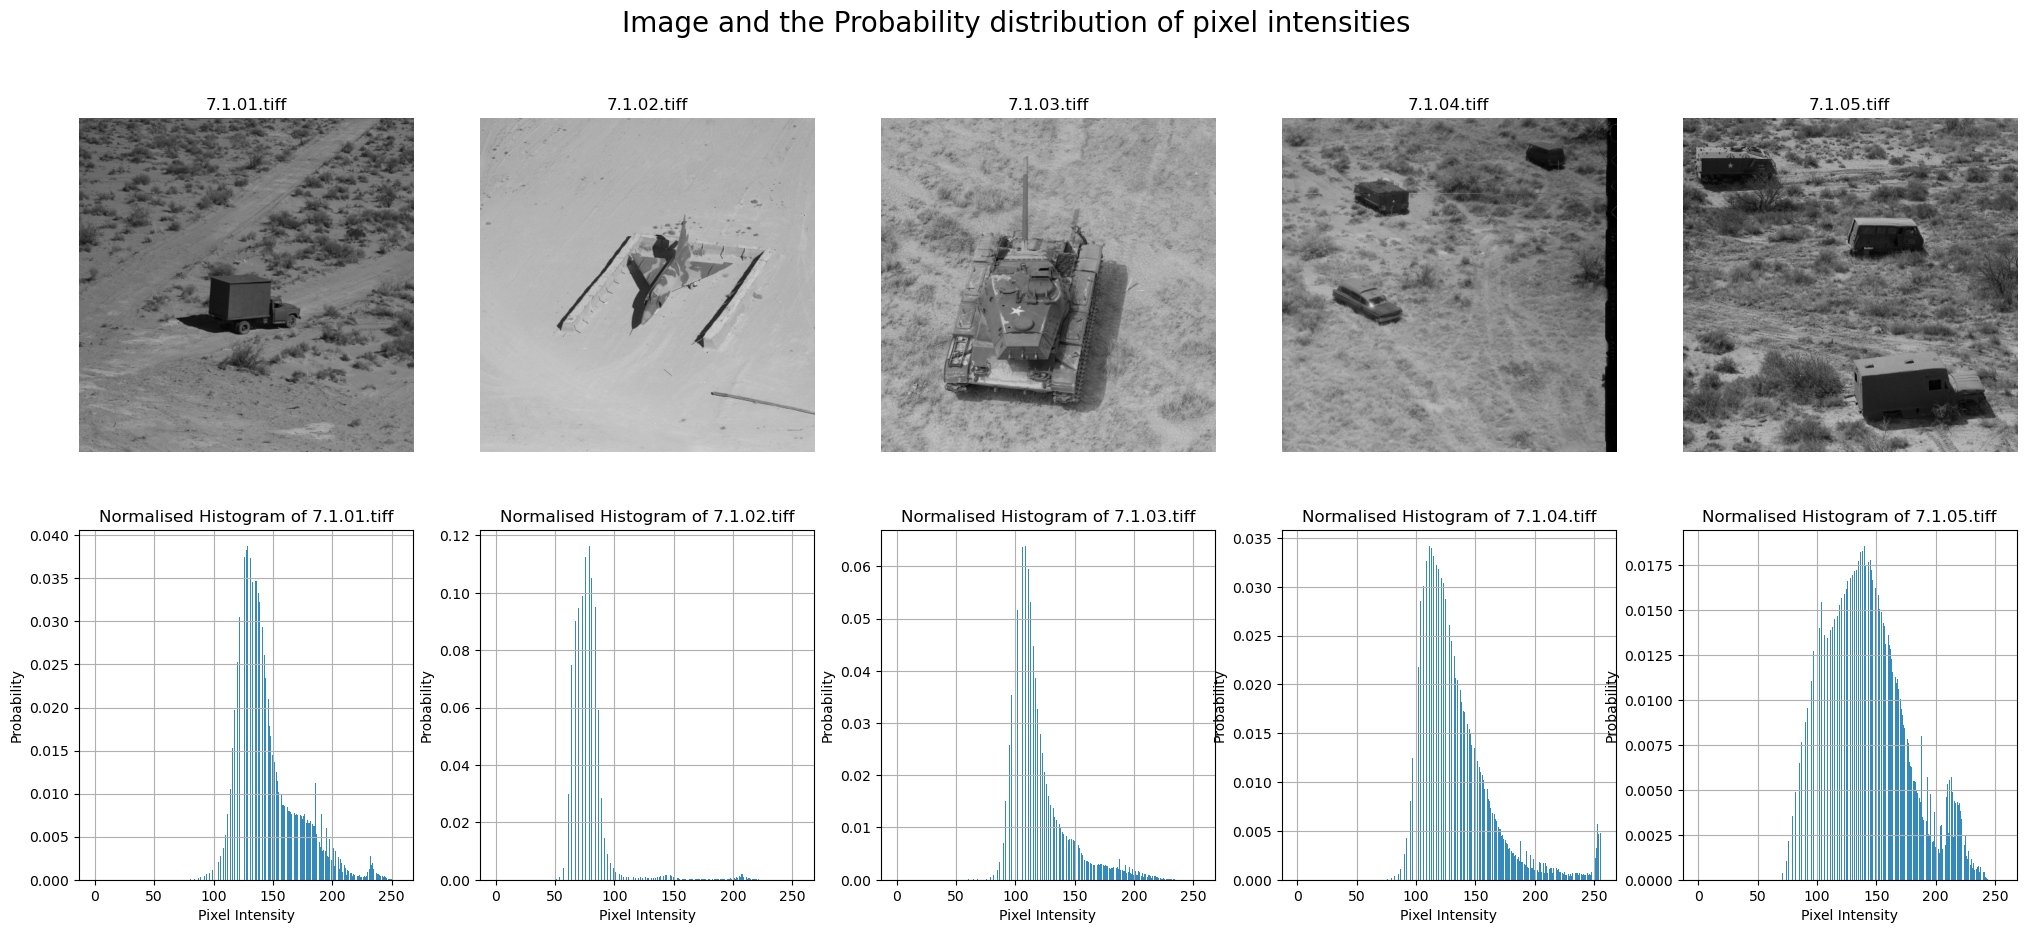

In [36]:
# Plotting the Image and their corresponding Normalised Histogram
file_names = [f"7.1.0{i}.tiff" for i in range(1, 6)]

# Plotting the image and the normalised histogram
plt.figure(figsize=(5*len(file_names), 10))

for idx, file in enumerate(file_names):
    image = plt.imread(f"./misc/{file}") # reading the image
    histogram = image2NormalisedHistogram(image) # computing the histogram

    # Plotting the image 
    plt.subplot(2, len(file_names), idx+1)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.title(f'{file}')

    # Plotting the histogram
    plt.subplot(2, len(file_names), idx+1+len(file_names))
    plt.bar(np.arange(256), histogram, color=COLORS[0])
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Probability')
    plt.title(f'Normalised Histogram of {file}')
    plt.grid(True)

plt.suptitle("Image and the Probability distribution of pixel intensities", fontsize=20)
plt.show()

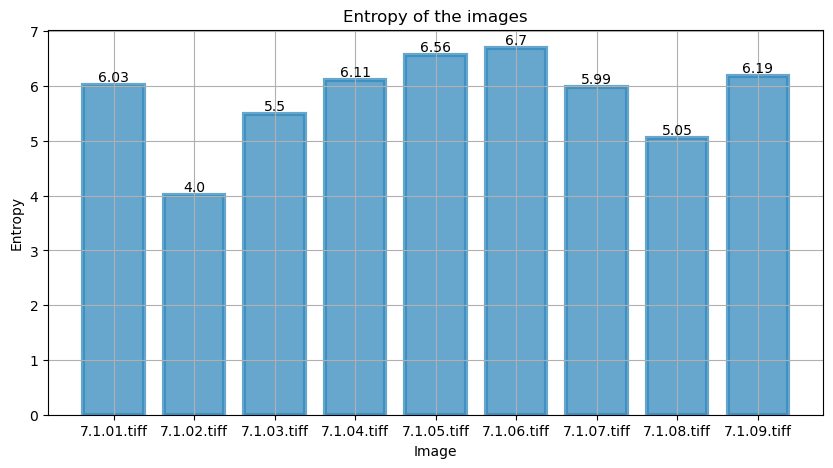

In [37]:
# Plotting the entropy for each image
entropies = []
file_names = [f"7.1.0{i}.tiff" for i in range(1, 10)]

# Computing the entropy for each image
for file in file_names:
    image = plt.imread(f"./misc/{file}")
    histogram = image2NormalisedHistogram(image)
    entropies.append(pmfEntropy(histogram))

# Plotting the entropy for each image
plt.figure(figsize=(10, 5))
for i in range(len(entropies)):
    plt.text(i, entropies[i]+0.01, f'{np.round(entropies[i], 2)}', ha='center', va='bottom') # adding the entropy value as text

plt.bar(np.arange(len(file_names)), entropies, edgecolor=COLORS[0], width=0.75, lw=3, alpha=0.75)
plt.xticks(np.arange(len(file_names)), file_names)
plt.xlabel('Image')
plt.ylabel('Entropy')
plt.title('Entropy of the images')
plt.grid(True)
plt.show()

As we can see that entropy of some of the images like ```7.1.02.tiff``` is low as compared to ```7.1.01.tiff```. This is because the image ```7.1.02.tiff``` has a lot of pixels with the same pixel intensity (the sand part) resulting in low entropy whereas the image ```7.1.01.tiff``` has a wider range of pixels intensities (the random bush part) resulting in high entropy. Similarly, the image ```7.1.05.tiff``` has a higher entropy because it has a wider range of pixel intensities as compared to ```7.1.01.tiff```.

## Joint PMF and Joint Entropy

In [38]:
def jointImage2NormalisedHistogram(image1, image2):
    """
    Converts two images to a joint normalised histogram
    image1 -> 2D numpy array (grayscale)
    image2 -> 2D numpy array (grayscale)
    """

    if len(image1.shape) != 2:
        raise ValueError('Image must be grayscale')
    if len(image2.shape) != 2:
        raise ValueError('Image must be grayscale')

    # Converting images from 0-1 to 0-255 scale
    image1 = np.round(image1*255).astype(np.uint8)
    image2 = np.round(image2*255).astype(np.uint8)
    
    joint_histogram = np.zeros((256, 256))
    
    # Computing the joint histogram
    for i in range(image1.shape[0]):
        for j in range(image1.shape[1]):
            joint_histogram[image1[i,j], image2[i,j]] += 1
    
    joint_histogram /= np.sum(joint_histogram)
    return joint_histogram

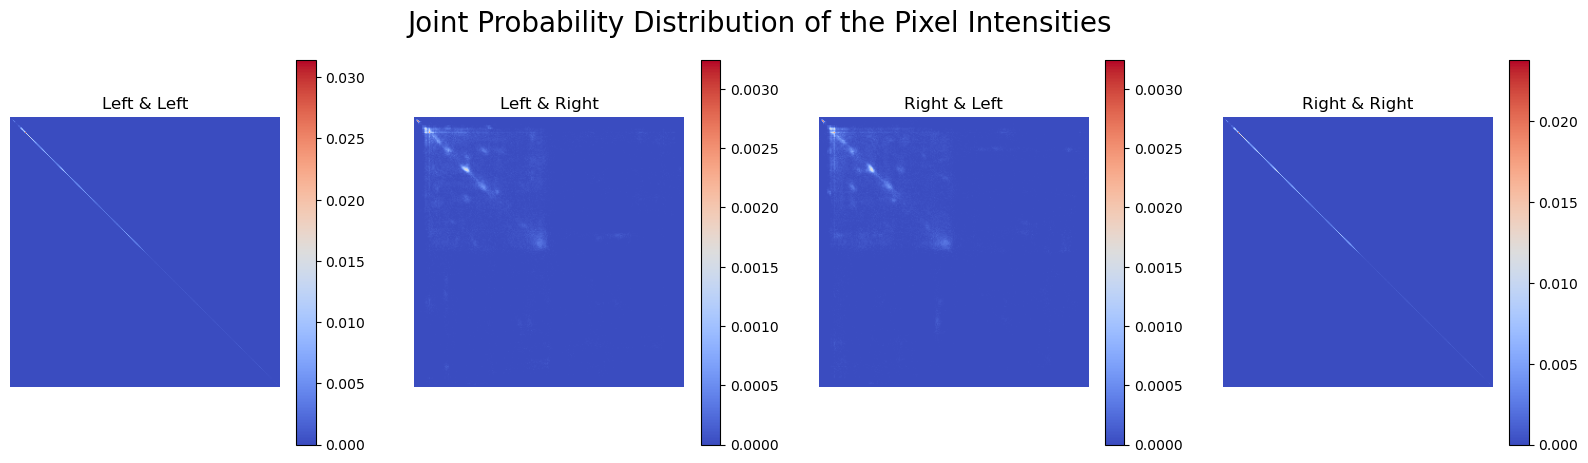

In [39]:
## Import image
file_names = ["left.png", "right.png"]

plt.figure(figsize=(10*len(file_names), 5))
titles = ["Left & Left", "Left & Right", "Right & Left", "Right & Right"]
idx = 0

for file1 in file_names:
    for file2 in file_names:    
        image1 = plt.imread(file1)
        image2 = plt.imread(file2)
        joint_histogram = jointImage2NormalisedHistogram(image1, image2)

        plt.subplot(1, len(file_names)*len(file_names), idx+1)
        plt.imshow(joint_histogram, cmap="coolwarm")
        plt.axis('off')
        plt.title(titles[idx])
        plt.colorbar()
        idx += 1
plt.suptitle("Joint Probability Distribution of the Pixel Intensities", fontsize=20)
plt.show()

The joint distributions where we are taking both the images to be same will result in a diagonal matrix because for each coordinate of both the image the pixel intensity will be same. Whereas, the joint distributions where we are taking different images will result in a non-diagonal matrix because for each coordinate of both the image the pixel intensity will be different.

In [40]:
def jointEntropy(joint_pmf):
    """
    Computes the Joint Entropy of a discrete distribution
    joint_pmf -> 2D numpy array (joint distribution)
    """
    
    # Checking if the probability distribution is valid
    if np.abs(np.sum(joint_pmf) - 1) > 1e-6:
        raise ValueError('The sum of probabilities must be 1')

    # Computing the entropy
    entropy = 0
    for i in range(joint_pmf.shape[0]):
        for j in range(joint_pmf.shape[1]):
            if joint_pmf[i,j] < 0:
                raise ValueError('Probabilities must be positive')
            elif joint_pmf[i,j] == 0:
                continue
            else:
                entropy -= joint_pmf[i,j]*np.log2(joint_pmf[i,j])
    return entropy

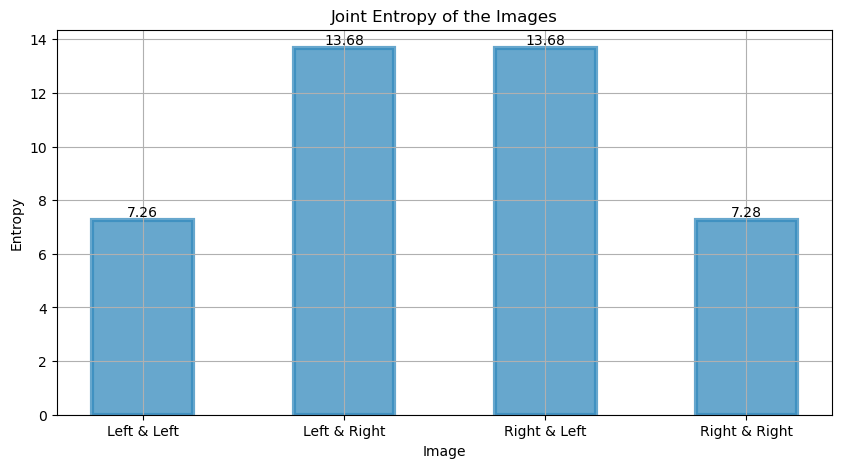

In [41]:
entropies = []
file_locs = ["left.png", "right.png"]

for file_loc1 in file_locs:
    for file_loc2 in file_locs:
        image1 = plt.imread(file_loc1)
        image2 = plt.imread(file_loc2)
        joint_histogram = jointImage2NormalisedHistogram(image1, image2) # computing the joint histogram
        entropies.append(jointEntropy(joint_histogram)) # computing the joint entropy

plt.figure(figsize=(10, 5))
plt.bar(np.arange(len(entropies)), entropies, edgecolor=COLORS[0], width=0.5, lw=3, alpha=0.75)
for i in range(len(entropies)):
    plt.text(i, entropies[i]+0.01, f'{np.round(entropies[i], 2)}', ha='center', va='bottom')
plt.xticks(np.arange(len(entropies)), ["Left & Left", "Left & Right", "Right & Left", "Right & Right"])
plt.xlabel('Image')
plt.ylabel('Entropy')
plt.title('Joint Entropy of the Images')
plt.grid(True)
plt.show()

## Conditional PMF and Conditional Entropy

In [42]:
def conditionalPMF(joint_histogram, conditional_rv_index, conditional_rv_value):
    """
    Computes the conditional probability mass function
    joint_histogram -> 2D numpy array (joint distribution)
    conditional_rv_index -> index of the random variable to condition on (0 or 1)
    conditional_rv_value -> value of the random variable to condition on
    """
    if conditional_rv_index not in [0, 1]:
        raise ValueError('conditional_rv_index must be 0 or 1')
    if conditional_rv_value not in np.arange(256):
        raise ValueError('conditional_rv_value must be between 0 and 255')
    
    if conditional_rv_index == 0:
        conditional_pmf = joint_histogram[conditional_rv_value, :].copy()
    else:
        conditional_pmf = joint_histogram[:, conditional_rv_value].copy()
    
    
    # Returning an array of zeros if the sum of probabilities is 0
    if np.sum(conditional_pmf) == 0:
        return conditional_pmf 
    
    conditional_pmf /= np.sum(conditional_pmf)
    return conditional_pmf

In [43]:
def conditionalEntropy(joint_histogram, conditional_rv_index):
    """
    Computes the conditional entropy of a discrete distribution
    joint_histogram -> 2D numpy array (joint distribution)
    conditional_rv_index -> index of the random variable to condition on (0 or 1)
    """
    
    if conditional_rv_index not in [0, 1]:
        raise ValueError('conditional_rv_index must be 0 or 1')    
    marginal_distribution = np.sum(joint_histogram, axis=conditional_rv_index)

    conditional_entropy = 0
    for i in range(joint_histogram.shape[conditional_rv_index]):
        conditional_pmf = conditionalPMF(joint_histogram, conditional_rv_index, i)

        # Checking whether the sum of probabilities is 0 or not 
        if np.sum(conditional_pmf) == 0:
            continue # If it is zero then entropy will be zero

        conditional_entropy += marginal_distribution[i]*pmfEntropy(conditional_pmf) # computing the conditional entropy i.e. E_X[H(Y|X=x)] = Sum(p(X=x)H(Y|X=x))
    
    return conditional_entropy

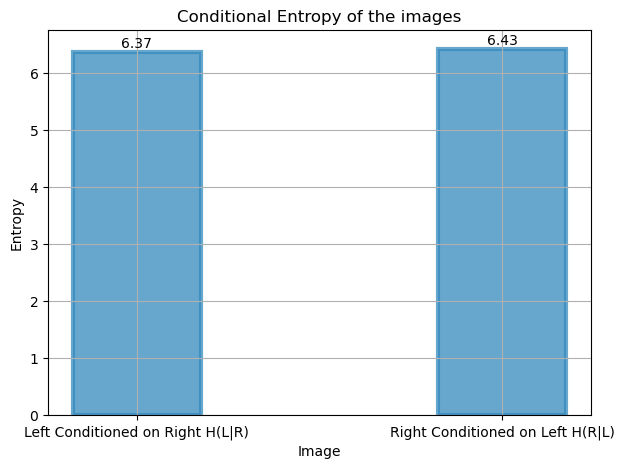

In [44]:
image1 = plt.imread("left.png")
image2 = plt.imread("right.png")
joint_histogram = jointImage2NormalisedHistogram(image1, image2) # Getting the Joint Distribution

entropies = []
entropies.append(conditionalEntropy(joint_histogram, 1)) # Conditional Entropy H(L|R)
entropies.append(conditionalEntropy(joint_histogram, 0)) # Conditional Entropy H(R|L)

plt.figure(figsize=(7, 5))
plt.bar(np.arange(len(entropies)), entropies, edgecolor=COLORS[0], width=0.35, lw=3, alpha=0.75)
for i in range(len(entropies)):
    plt.text(i, entropies[i]+0.01, f'{np.round(entropies[i], 2)}', ha='center', va='bottom')
plt.xticks(np.arange(len(entropies)), ['Left Conditioned on Right H(L|R)', 'Right Conditioned on Left H(R|L)'])
plt.xlabel('Image')
plt.ylabel('Entropy')
plt.title('Conditional Entropy of the images')
plt.grid(True)
plt.show()

## KL Divergence

In [45]:
def klDivergence(pmf1, pmf2):
    """
    Computes the KL divergence between two discrete distributions
    pmf1 -> list of probabilities (We don't need the outcomes)
    pmf2 -> list of probabilities (We don't need the outcomes)
    """
    
    # Checking if the probability distributions are valid
    if np.abs(sum(pmf1) - 1) > 1e-6 or np.abs(sum(pmf2) - 1) > 1e-6:
        raise ValueError('The sum of probabilities must be 1')
    if len(pmf1) != len(pmf2):
        raise ValueError('The two distributions must have the same support') 

    # Computing the KL divergence
    kl = 0
    for p1, p2 in zip(pmf1, pmf2):
        if p1 < 0 or p2 < 0:
            raise ValueError('Probabilities must be positive')
        elif p1 == 0: # 0*log(0/q(x)) = 0
            continue
        elif p2 == 0: # p(x)*log(p(x)/0) = inf
            return np.inf
        else:
            kl += p1*np.log2(p1/p2)
    return kl

In [46]:
rs = np.array([0.1, 0.2, 0.5, 0.75, 0.9]) # r values
ss = np.linspace(0, 1, 1000) # 1000 values between 0 and 1 (inclusive)

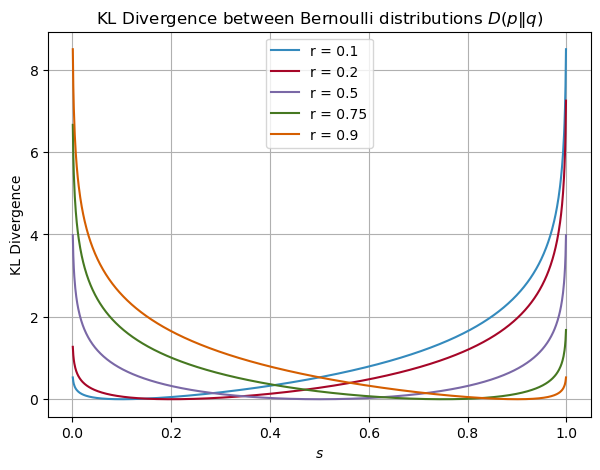

In [47]:
# Calculating the KL divergence p = Bernoulli(r) and q = Bernoulli(s) i.e. D(p||q)
kls = [[klDivergence([r, 1-r], [s, 1-s]) for s in ss] for r in rs]
plt.figure(figsize=(7, 5))
for i, kl in enumerate(kls):
    plt.plot(ss, kl, label=f'r = {rs[i]}')
plt.xlabel(r'$s$')
plt.ylabel('KL Divergence')
plt.title(r'KL Divergence between Bernoulli distributions $D(p\|q)$')
plt.grid(True)
plt.legend(loc="upper center")
plt.show()

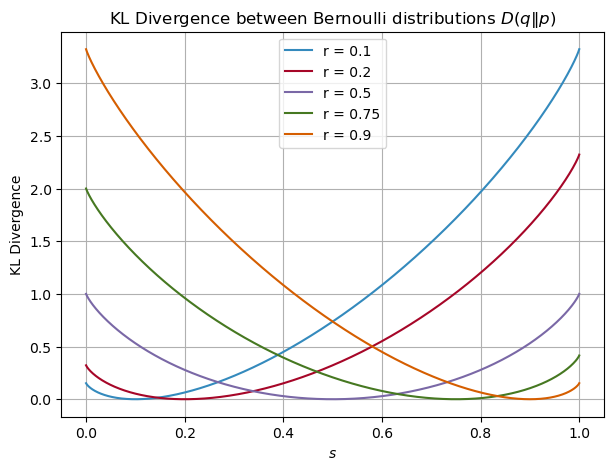

In [48]:
# Calculating the KL divergence for q = Bernoulli(s) and p = Bernoulli(r) i.e. D(q||p)
kls = [[klDivergence([s, 1-s], [r, 1-r]) for s in ss] for r in rs]
plt.figure(figsize=(7, 5))
for i, kl in enumerate(kls):
    plt.plot(ss, kl, label=f'r = {rs[i]}')
plt.xlabel(r'$s$')
plt.ylabel('KL Divergence')
plt.title(r'KL Divergence between Bernoulli distributions $D(q\|p)$')
plt.grid(True)
plt.legend(loc="upper center")
plt.show()

We can see from the above plots that both $D(p\|q)$ and $D(q\|p)$ are non-negative $\forall r,s \in [0,1]$.

Proving $D(p\|q) \ge 0$:

$$
\begin{align*}
D(p\|q) &= \sum_{x} p(x) \log \frac{p(x)}{q(x)}\\
&= -\sum_{x} p(x) \log \frac{q(x)}{p(x)}\\
&= -\mathbb E_{p(x)}\left[\log \frac{q(X)}{p(X)}\right]\\\tag{Jensen's Inequality for convex function $\rightarrow -\log(\cdot)$}
&\ge -\log \mathbb E_{p(x)}\left[\frac{q(X)}{p(X)}\right]\\ 
&= -\log \sum_{x} p(x) \frac{q(x)}{p(x)}\\
&= -\log \sum_{x} q(x)\\
&= -\log 1\\
&= 0\\
\end{align*}
$$

$$
\Rightarrow D(p\|q) \ge 0\qquad\qquad
$$

As $D(p\|q) \ge 0$ then without loss of generality, $D(q\|p) \ge 0$

In [49]:
p = [0.5, 0.5]
q = [0.8, 0.2]
print(f'D(p||q) = {klDivergence(p, q)}')
print(f'D(q||p) = {klDivergence(q, p)}')
print("Difference between D(p||q) and D(q||p):", klDivergence(p, q) - klDivergence(q, p))

D(p||q) = 0.32192809488736235
D(q||p) = 0.27807190511263774
Difference between D(p||q) and D(q||p): 0.04385618977472461


Proving that $D(p\| q) \ne D(q\|p)$:

$$
\begin{align*}
D(p\|q) &= \sum_{x} p(x) \log \frac{p(x)}{q(x)}\\
&= r \log \frac{r}{s} + (1-r) \log \frac{1-r}{1-s}\\
\end{align*}
$$

$$
\begin{align*}
D(q\|p) &= \sum_{x} q(x) \log \frac{q(x)}{p(x)}\\
&= s \log \frac{s}{r} + (1-s) \log \frac{1-s}{1-r}\\
\end{align*}
$$

From the above two expressions we can see that $D(p\|q) \ne D(q\|p)$ because

$$
\begin{align*}
D(p\|q) - D(q\|p) &= r \log \frac{r}{s} + (1-r) \log \frac{1-r}{1-s} - s \log \frac{s}{r} - (1-s) \log \frac{1-s}{1-r}\\
&= r \log \frac{r}{s} - s \log \frac{s}{r} + (1-r) \log \frac{1-r}{1-s} - (1-s) \log \frac{1-s}{1-r}\\
&= (r+s)\log \frac{r}{s} + (2-r-s) \log \frac{1-r}{1-s}\\
\end{align*}
$$

The above expression doesn't always evaluate to zero. Example for $r=0.5$ and $s=0.8$ the above expression evaluates to $\approx0.0438$. (Calculated above in the code)

Now, considering the case when $r = s$ i.e. $p = q$.

$$
\begin{align*}
D(p\|q) = D(q\|p) &= r \log \frac{r}{s} + (1-r) \log \frac{1-r}{1-s}\\
&= r \log \frac{r}{r} + (1-r) \log \frac{1-r}{1-r}\\
&= 0\\
\end{align*}
$$

Thus, both $D(p\|q)$ and $D(q\|p)$ evaluate to zero when $p=q$ i.e. $r = s$.

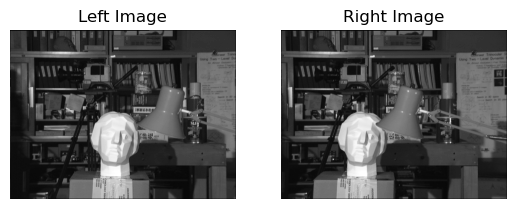

D(Histogram1||Histogram2) = 0.015104015237387055
D(Histogram2||Histogram1) = 0.014409785833354494


In [50]:
image1 = plt.imread("left.png")
image2 = plt.imread("right.png")

histogram1 = image2NormalisedHistogram(image1)
histogram2 = image2NormalisedHistogram(image2)

plt.subplot(1, 2, 1)
plt.imshow(image1, cmap='gray')
plt.axis('off')
plt.title('Left Image')

plt.subplot(1, 2, 2)
plt.imshow(image2, cmap='gray')
plt.axis('off')
plt.title('Right Image')
plt.show()

print(f'D(Histogram1||Histogram2) = {klDivergence(histogram1, histogram2)}')
print(f'D(Histogram2||Histogram1) = {klDivergence(histogram2, histogram1)}')

We can see that the above two images are very similar to each other. Moreover, the KL divergence between the two images is very low. Thus, we can consider the KL divergence as a measure of distance between two images or two probability distributions. In terms of similarity, the higher the KL divergence between two images, the more dissimilar they are and vice versa.